In [ ]:
# from google.colab import drive 
# drive.mount('/content/drive/')
# %cd /content/drive/My Drive/Colab Notebooks/

In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [4]:
#Filtering the data to get the desired range
#Grouping the data using hourly timestamp and forward filling the NULL values

import datetime, pytz

def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
drop_row = data[ (data['Timestamp'] >= '2020-06-01 00:00:00') ].index
data.drop(drop_row, inplace = True)
drop_row = data[ (data['Timestamp'] < '2017-05-01 00:00:00')].index
data.drop(drop_row, inplace = True)



data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)
data.head()
X1 = np.array(data.index)
X2 = np.array(data.iloc[:,0])
X1=X1.reshape(-1,1)
X2=X2.reshape(-1,1)

print(X1)
print(X2)

[['2017-05-01T00:00:00.000000000']
 ['2017-05-01T01:00:00.000000000']
 ['2017-05-01T02:00:00.000000000']
 ...
 ['2020-05-31T21:00:00.000000000']
 ['2020-05-31T22:00:00.000000000']
 ['2020-05-31T23:00:00.000000000']]
[[1353.652122 ]
 [1351.8682027]
 [1355.014177 ]
 ...
 [9512.1259615]
 [9505.9267055]
 [9463.5418988]]


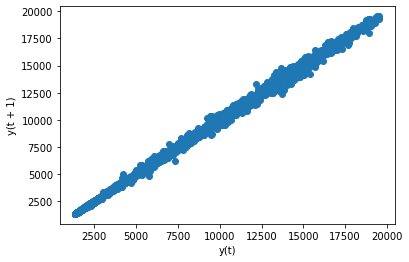

In [7]:
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

In [21]:
# # Split data at 3 months before end for training and test data
train = data[ (data.index < '2020-03-01 00:00:00') ]
test = data[ (data.index >= '2020-03-01 00:00:00') ]
print(train)

                     Weighted_Price
Timestamp                          
2017-05-01 00:00:00     1353.652122
2017-05-01 01:00:00     1351.868203
2017-05-01 02:00:00     1355.014177
2017-05-01 03:00:00     1346.172659
2017-05-01 04:00:00     1355.807171
...                             ...
2020-02-29 19:00:00     8665.654128
2020-02-29 20:00:00     8667.516930
2020-02-29 21:00:00     8659.019682
2020-02-29 22:00:00     8638.064938
2020-02-29 23:00:00     8631.762926

[24840 rows x 1 columns]


In [40]:
from statsmodels.tsa.ar_model import AutoReg
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: {}'.format(model_fit.params))

Coefficients: intercept             3.136595
Weighted_Price.L1     0.949777
Weighted_Price.L2    -0.007074
Weighted_Price.L3     0.034622
Weighted_Price.L4    -0.000003
Weighted_Price.L5     0.022927
Weighted_Price.L6    -0.013451
Weighted_Price.L7     0.031047
Weighted_Price.L8    -0.008997
Weighted_Price.L9    -0.025881
Weighted_Price.L10    0.054731
Weighted_Price.L11   -0.044640
Weighted_Price.L12    0.018755
Weighted_Price.L13    0.000547
Weighted_Price.L14   -0.007435
Weighted_Price.L15   -0.000857
Weighted_Price.L16    0.043140
Weighted_Price.L17   -0.015948
Weighted_Price.L18   -0.007305
Weighted_Price.L19   -0.004028
Weighted_Price.L20   -0.006221
Weighted_Price.L21   -0.015448
Weighted_Price.L22   -0.019174
Weighted_Price.L23    0.032948
Weighted_Price.L24   -0.048160
Weighted_Price.L25    0.008800
Weighted_Price.L26   -0.017838
Weighted_Price.L27   -0.023111
Weighted_Price.L28    0.067155
Weighted_Price.L29    0.000723
dtype: float64


C:\Users\Hp\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Hp\miniconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [49]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print((predictions[i], test["Weighted_Price"][i]))

(8627.302364373072, 8528.2245341)
(8618.35655964722, 8532.326123899998)
(8615.32510660571, 8653.0235016)
(8611.778636423564, 8632.9268293)
(8612.898512875901, 8613.1213666)
(8611.67458617875, 8576.8400845)
(8602.218652187685, 8582.6717013)
(8602.098602439317, 8536.5927074)
(8600.812753858467, 8542.3072587)
(8598.67027468772, 8521.1840291)
(8601.523022906853, 8541.7640103)
(8604.464379221774, 8567.260942)
(8607.987118354227, 8685.2895881)
(8612.472845733026, 8578.2289379)
(8613.48294425171, 8611.456580299999)
(8612.147415603922, 8562.4354578)
(8610.852367385301, 8550.9336424)
(8612.938789544814, 8515.100594399999)
(8610.310300658044, 8493.558858)
(8607.772263390505, 8424.8143612)
(8609.341431076853, 8541.1329338)
(8605.64701419087, 8478.945674699999)
(8605.318365043984, 8519.2256541)
(8606.200247862273, 8547.7176815)
(8607.596409821452, 8503.169627399999)
(8609.196136634686, 8542.9238395)
(8609.488306235698, 8552.372182899999)
(8610.373545696411, 8641.0200041)
(8611.071046746387, 8600.1

(8215.563490184939, 9534.81)
(8215.440351294765, 9537.0981706)
(8215.317255695154, 9447.852993200002)
(8215.19420337089, 9489.747205299998)
(8215.071194306754, 9721.9870902)
(8214.948228487543, 9692.0428181)
(8214.82530589805, 9662.4090765)
(8214.702426523078, 9629.7789355)
(8214.579590347434, 9641.1705195)
(8214.456797355933, 9573.557106)
(8214.334047533393, 9558.9159544)
(8214.211340864636, 9564.8168817)
(8214.088677334494, 9535.718217399999)
(8213.966056927797, 9558.7832219)
(8213.843479629386, 9526.369125700001)
(8213.720945424106, 9562.176391399998)
(8213.598454296807, 9592.2982202)
(8213.476006232346, 9594.457576100001)
(8213.353601215582, 9576.7034708)
(8213.231239231385, 9542.516234)
(8213.108920264622, 9455.231056499999)
(8212.98664430017, 9466.498493899999)
(8212.864411322915, 9522.7107574)
(8212.742221317741, 9491.520374700001)
(8212.620074269544, 9490.22)
(8212.497970163218, 9512.1259615)
(8212.37590898367, 9505.9267055)
(8212.253890715807, 9463.541898799998)


In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test["Weighted_Price"], predictions))
print('RMSE value of the Auto-Regression Model is: {}'.format(rmse))

MAPE = np.mean(np.abs((test["Weighted_Price"] - predictions)/test["Weighted_Price"]))*100
print('MAPE value of the Auto-Regression Model is:', MAPE)



RMSE value of the Auto-Regression Model is: 1538.3890575185324
MAPE value of the Auto-Regression Model is: 19.07994407389044


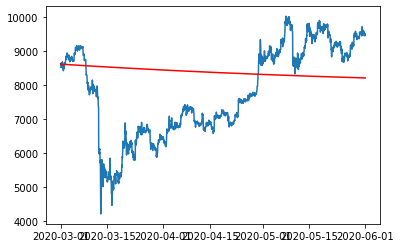

In [51]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()